# Load Libraries and data

In [16]:
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import datetime as dt


In [17]:
#settings
params = {'legend.fontsize': 9,
          'figure.figsize': (15, 5),
         'axes.labelsize': 10,
         'axes.titlesize':11,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'axes.grid': True,
         'axes.grid.which': 'both',	
         'grid.linestyle': '--',
         'grid.color': 'silver',
         'grid.alpha': 0.5,
         'lines.linewidth': 1,         
         'lines.markersize': 4
         
         }

plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 150
blue = '#005AB5'
red = '#DC3220' 

In [18]:
df = pd.read_csv('../Data/01_Brazil_Troughtput_clean.csv')

# Check data

In [19]:
df.tail()

,Date,TEU
175,2024-08-01,1222454.00
176,2024-09-01,1218640.50
177,2024-10-01,1254651.25
178,2024-11-01,1172446.00
179,2024-12-01,1181565.75


In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['TEU'] = df['TEU'].astype(int)
df.index = df['Date']

In [21]:
df.describe()

,Date,TEU
count,180,1.800000e+02
mean,2017-06-16 07:44:00,8.269564e+05
min,2010-01-01 00:00:00,4.478690e+05
25%,2013-09-23 12:00:00,7.214148e+05
50%,2017-06-16 00:00:00,8.057360e+05
75%,2021-03-08 18:00:00,9.308000e+05
max,2024-12-01 00:00:00,1.254651e+06
std,NaN,1.574483e+05


# Transform magnitude of TEU to thousand for a clean visualization

In [22]:
df['TEU'] = round( df['TEU']/1000, 3)

# Create Year total Dataset

In [23]:
df_group_year = pd.DataFrame(df.groupby(df.index.year)['TEU'].sum() , columns=['TEU'], index=df.index.year.unique() )

df_group_year['TEU'] = df_group_year['TEU'].astype(int)

df_group_year['pct_change'] = df_group_year['TEU'].pct_change().fillna(0)

df_group_year.to_csv('../Data/02_TEU_year.csv',index_label='Year')

df_group_year.head()

,TEU,pct_change
Date,,
2010,6783,0.000000
2011,7905,0.165414
2012,8218,0.039595
2013,8994,0.094427
2014,9315,0.035690


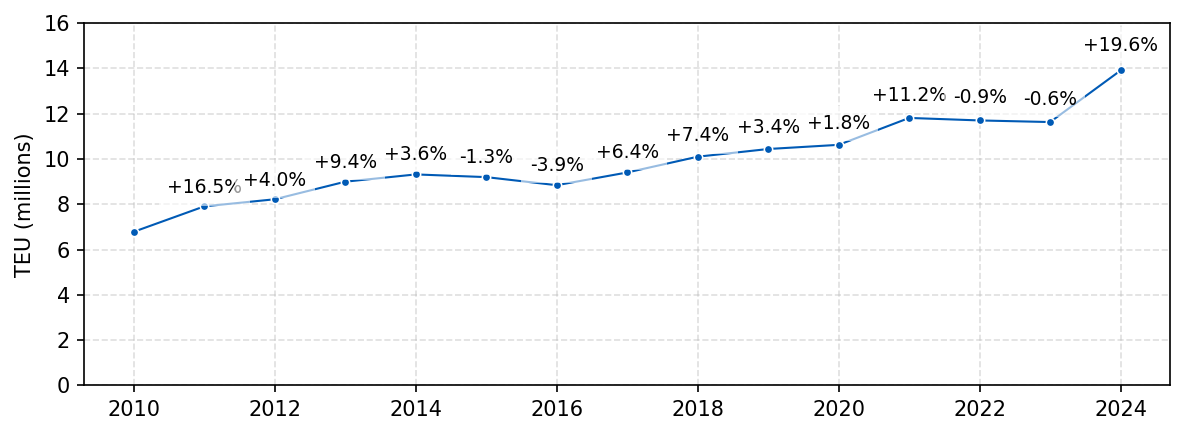

In [24]:
plt.figure(figsize=(8, 3))  

# ax1 = plt.subplot(2, 1, 1)
# Plot 
sns.lineplot(x=df_group_year.index, y=df_group_year['TEU']/1000, color=blue, marker='o')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Axis labels and limits
plt.ylabel("TEU (millions)")
plt.ylim(0, 16)
plt.xlabel('')

# Annotate TEU values and percentage change
for x, y, pct in zip(df_group_year.index, df_group_year['TEU']/1000, df_group_year['pct_change']):
    change_str = f"+{pct:.1%}" if pct > 0 else f"{pct:.1%}" if pct != 0 else ""
    plt.text(x, y * 1.05, f"{change_str}",
             ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'),
             fontsize=9,
)

plt.tight_layout()

plt.savefig('../Figures/svg/Figure01.svg')
plt.savefig('../Figures/png/Figure01.png', dpi=600)

plt.show()

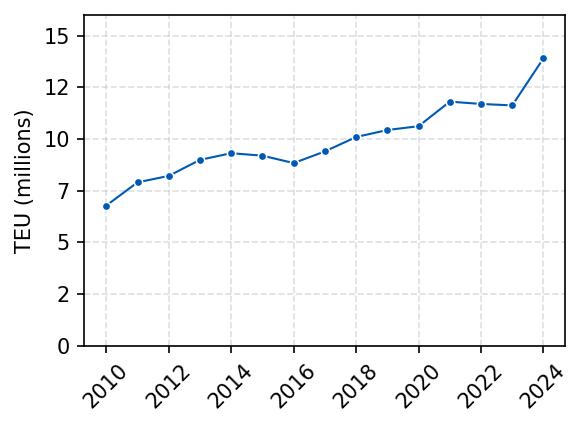

In [25]:
plt.figure(figsize=(4, 3))  

# ax1 = plt.subplot(2, 1, 1)
# Plot 
sns.lineplot(x=df_group_year.index, y=df_group_year['TEU']/1000, color=blue, marker='o')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Axis labels and limits
plt.ylabel("TEU (millions)")
plt.ylim(0, 16)
plt.xlabel('')

# Annotate TEU values and percentage change
# for x, y, pct in zip(df_group_year.index, df_group_year['TEU']/1000, df_group_year['pct_change']):
#     change_str = f"+{pct:.1%}" if pct > 0 else f"{pct:.1%}" if pct != 0 else ""
#     plt.text(x, y * 1.05, f"{change_str}",
#              ha='center', va='bottom',
#              bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'),
#              fontsize=7,
# )

plt.xticks( [2010,  2012,  2014,  2016,  2018,  2020,  2022, 2024], rotation=45)
plt.tight_layout()

plt.savefig('../Figures/Presentation/Figure01.svg')

plt.show()

# Create Montlhy totals dataset

In [26]:
df_group_month = pd.DataFrame( df.groupby(df.index)['TEU'].sum() , columns=['TEU'], index=df.index.unique() )
df_group_month = df_group_month.sort_index(ascending=True)

df_group_month.to_csv('../Data/02_TEU_month.csv',index_label='Date') #Save dataset to a CSV file

In [27]:
df_group_month.head()

,TEU
Date,
2010-01-01,493.136
2010-02-01,447.869
2010-03-01,532.599
2010-04-01,485.357
2010-05-01,596.628


In [28]:
#max values
Max_teu = df_group_month["TEU"].max()
max_loc = df_group_month["TEU"].idxmax()

print(f"Max '000 TEU: {Max_teu} on {max_loc}")



Max '000 TEU: 1254.651 on 2024-10-01 00:00:00


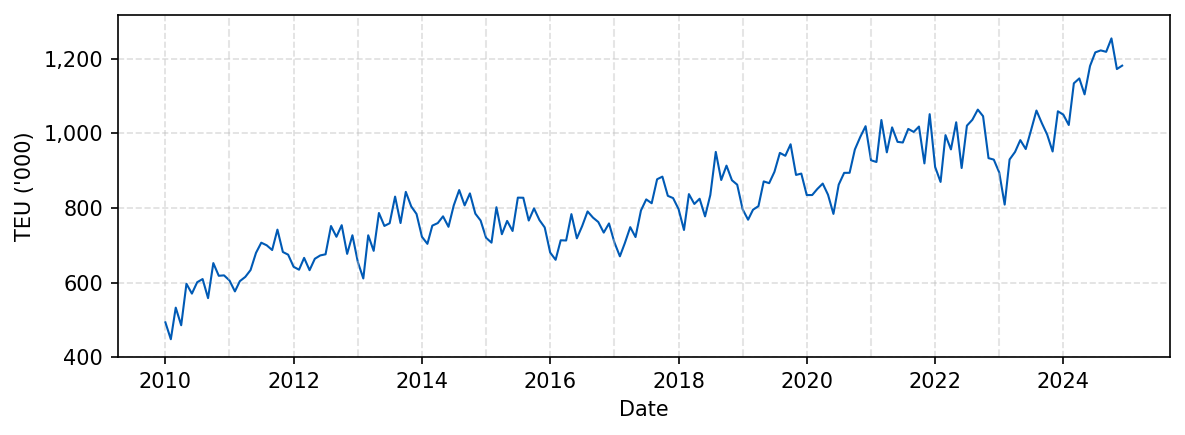

In [35]:
plt.figure(figsize=(8,3))

plt.plot(df_group_month.index, df_group_month['TEU'], color=blue, label='Troughput (TEU)')
plt.ylabel("TEU ('000)")
plt.xlabel('Date')
plt.ylim(400, df_group_month['TEU'].max()*1.05)

for i in df_group_month.index:
    if i.month == 1 and i.year%2  :
        plt.vlines(i, ymin=400, ymax=df_group_month['TEU'].max()*1.05, color='silver', alpha=0.4, linestyles='--', linewidth=1)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()




plt.savefig('../Figures/svg/Figure03.svg')
plt.savefig('../Figures/png/Figure03.png', dpi=600)

plt.show()


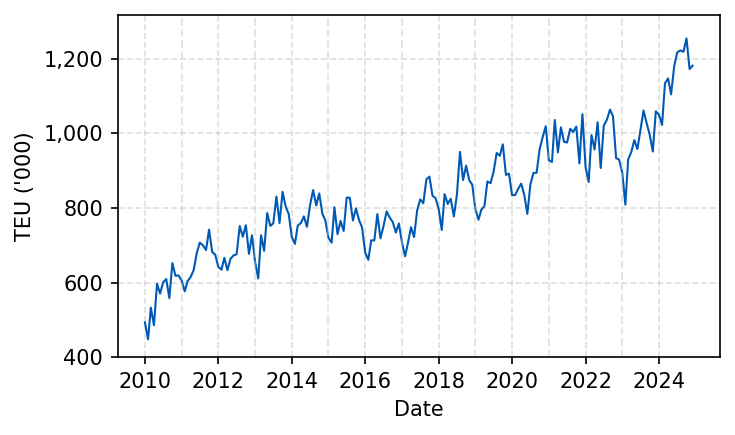

In [45]:
plt.figure(figsize=(5,3))

plt.plot(df_group_month.index, df_group_month['TEU'], color=blue, label='Troughput (TEU)')
plt.ylabel("TEU ('000)")
plt.xlabel('Date')
plt.ylim(400, df_group_month['TEU'].max()*1.05)

for i in df_group_month.index:
    if i.month == 1 and i.year%2  :
        plt.vlines(i, ymin=400, ymax=df_group_month['TEU'].max()*1.05, color='silver', alpha=0.4, linestyles='--', linewidth=1)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.yticks
plt.tight_layout()
plt.savefig('../Figures/Presentation/Figure03.svg')
plt.show()


# Evaluate mean change over time

                Mean
Segment             
Full Dataset   827.0
1              636.0
2              764.0
3              787.0
4              913.0
5             1034.0


c:\Users\rafae\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


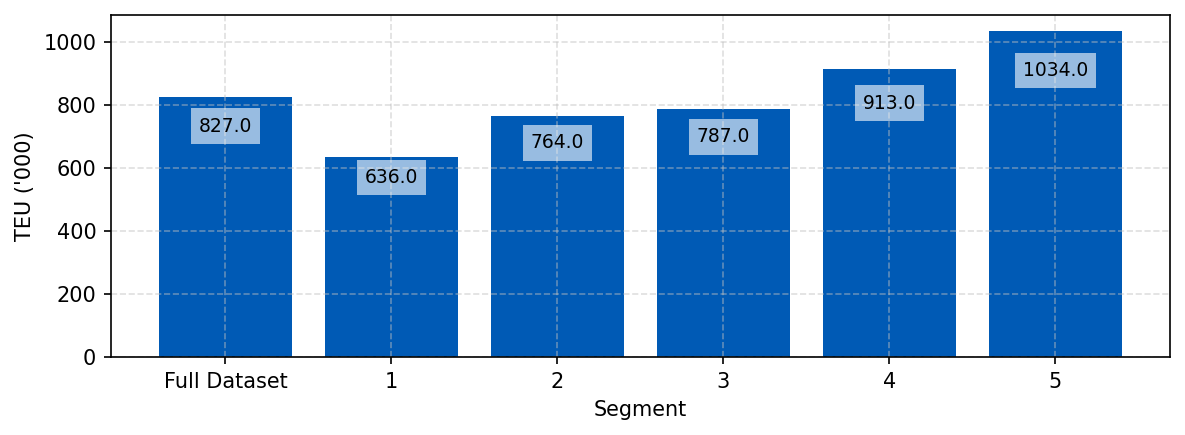

In [179]:
segments = np.array_split(df_group_month, 5)
mean = df_group_month["TEU"].mean().round(0)
means = [mean]
splits = ['Full Dataset']

for i, segment in enumerate(segments):
    i += 1
    mean = segment["TEU"].mean().round(0)
    means.append(mean)
    splits.append(f'{i}')

df_splits = pd.DataFrame({'Segment': splits, 'Mean': means})
df_splits.set_index('Segment', inplace=True)

print(df_splits)

plt.figure(figsize=(8,3))

plt.bar(df_splits.index, df_splits['Mean'], color=blue)
plt.ylabel("TEU ('000)")
plt.xlabel('Segment')
plt.tight_layout()

for i in df_splits.index:
    plt.text(i, df_splits['Mean'][i]*0.85,
             f"{df_splits['Mean'][i]}",
             ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'),
             fontsize=9)

plt.show()


# Evaluate diff

In [226]:
diff = df_group_month.diff(1)

diff.columns = ["TEU change ('000')"]

diff["month"] = diff.index.year.astype(str) + '-' + diff.index.month.astype(str) #diff.index.month
diff.head(5)

,TEU change ('000'),month
Date,,
2010-01-01,NaN,2010-1
2010-02-01,-45.267,2010-2
2010-03-01,84.730,2010-3
2010-04-01,-47.242,2010-4
2010-05-01,111.271,2010-5


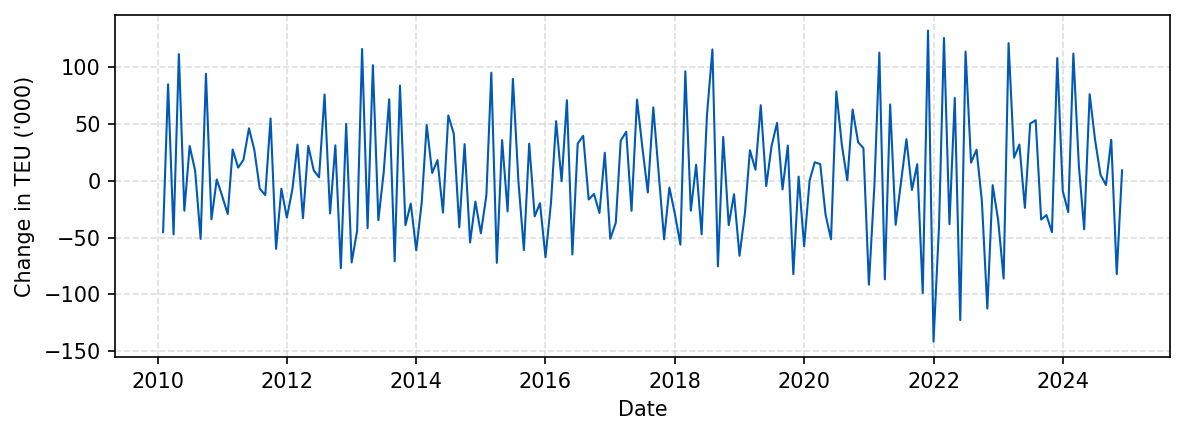

In [227]:
plt.figure(figsize=(8,3))

plt.plot(diff.index, diff["TEU change ('000')"], color=blue, label='Troughput (TEU)')

plt.ylabel("Change in TEU ('000)")
plt.xlabel('Date')

plt.tight_layout()

plt.show()

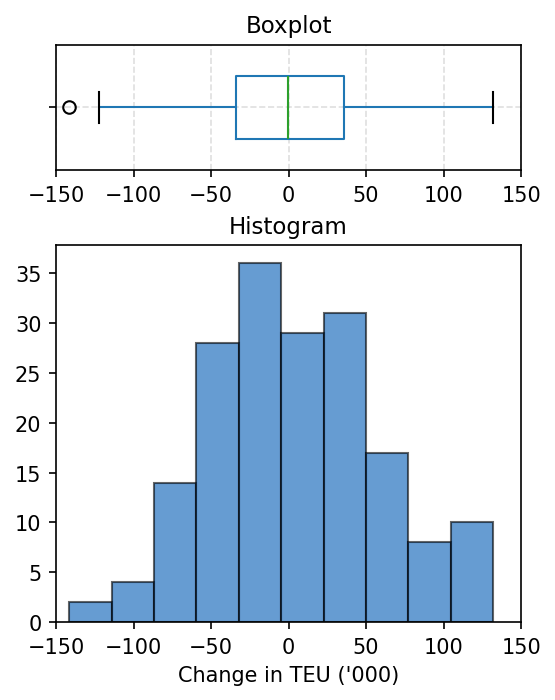

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 5), gridspec_kw={'height_ratios': [2, 6]})



diff.boxplot(ax=ax1, vert=False, widths=0.5)  # adjust the width to change the box width
ax1.set_yticklabels([])
ax1.set_xlim(-150,150)


diff.hist(ax=ax2, edgecolor='k', color= blue, alpha= 0.6)
ax2.set_xlabel("Change in TEU ('000)")
ax2.set_xlim(-150,150)
ax2.grid()

ax1.set_title('Boxplot')
ax2.set_title('Histogram')

plt.savefig('../Figures/svg/Figure04.svg')
plt.savefig('../Figures/png/Figure04.png', dpi=600)

plt.show()